# Problem statement:
Goal: Predict whether a tumor is malignant (0) or benign (1) based on features extracted from breast cancer cell images (like radius, texture, area, etc.).

# Step 1: Load & prepare Dataset

In [4]:
import pandas as pd
data = pd.read_csv('Breast_Cancer_Dataset.csv')
print(data.head())
print(data.describe())
print(data.info())





   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
print(data.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


Import Libraries

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Prepare the data
X = data.drop(columns=['target'])
y = data['target']

# Step 2: Scale features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train SVM

In [11]:
svm_model = SVC(kernel='rbf', C = 1, gamma='auto')
svm_model.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Step 5: Predict

In [12]:
y_pred = svm_model.predict(X_test)

In [16]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



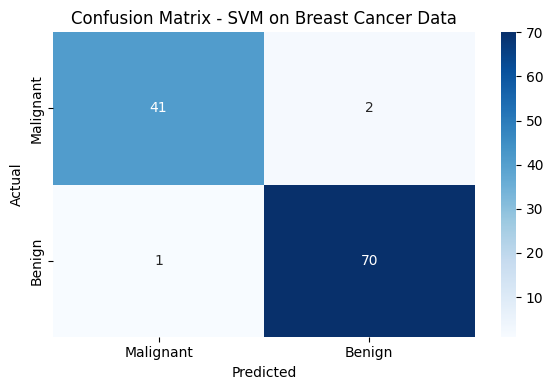

In [17]:
# Visualize the results
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM on Breast Cancer Data")
plt.tight_layout()
plt.show()

Interpretation:
True Positives (41): 41 malignant tumors correctly classified as malignant.

False Negatives (2): 2 malignant tumors wrongly predicted as benign → critical error in healthcare.

False Positives (1): 1 benign tumor incorrectly predicted as malignant.

True Negatives (70): 70 benign tumors correctly classified.